In [23]:
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Conv2D, BatchNormalization, Flatten, MaxPooling2D, Lambda, ReLU
import pandas as pd
import numpy as np
import cv2, joblib
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split




In [24]:
df = pd.read_csv("data.csv")
df.labels = df.labels.astype('category')
# lb = joblib.load("labelbinarizer.joblib")
lb = LabelBinarizer()
lb.fit_transform([
    'circle',
    'up',
    'down',
    'left',
    'right',

    'eight',
    'nine',
    'seven',
    'six',
    'zero',

    'v',
    'w',
    'x',
    'y',
    'z'


])
print(df.isnull().values.any())

b_size = 64
channels = 1
dim = 64

x_train, x_test, y_train, y_test = train_test_split(df.img_path, df.labels,
                                                    stratify=df.labels, test_size=0.1, random_state=2020)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)



False


In [25]:
x_train_img = np.empty(shape=(0,dim,dim,channels))
for row in x_train:
    frame = cv2.imread(row, 0)/255
    frame = cv2.resize(frame, (64,64))
    arr = np.reshape(frame, newshape=(1,dim,dim,channels))
    x_train_img = np.append(x_train_img, arr, axis=0)

x_test_img = np.empty(shape=(0,dim,dim,channels))
for row in x_test:
    frame = cv2.imread(row, 0)/255
    frame = cv2.resize(frame, (64,64))
    arr = np.reshape(frame, newshape=(1,dim,dim,channels))
    x_test_img = np.append(x_test_img, arr, axis=0)

print("Images Loaded")

Images Loaded


In [26]:
input_layer = Input(shape=(dim,dim,channels))
x = Conv2D(32, (3,3), padding="same")(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(32, (3,3), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D()(x)

x = Conv2D(64, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(64, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(128, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D()(x)

x = Conv2D(256, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(256, (5,5), padding="same")(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(15, activation='softmax')(x)

# Connect the inputs with the outputs
cnn = Model(inputs=input_layer, outputs=output)

In [27]:
cnn.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.00006, decay=1e-6), metrics=['acc'])
cnn.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
batch_normalization_17 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_17 (ReLU)              (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_18 (ReLU)              (None, 64, 64, 32)        0   

In [28]:
history = cnn.fit(x_train_img, y_train, batch_size=b_size, epochs=100, verbose=1,
                          validation_data=(x_test_img,y_test))

Train on 2268 samples, validate on 252 samples
Epoch 1/100
2268/2268 [==============================] - 48s 21ms/step - loss: 0.5636 - acc: 0.8646 - val_loss: 2.7479 - val_acc: 0.0635

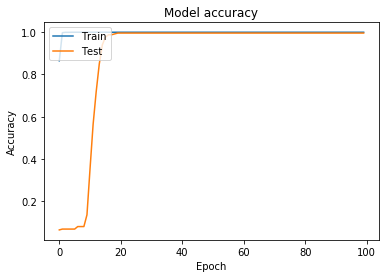

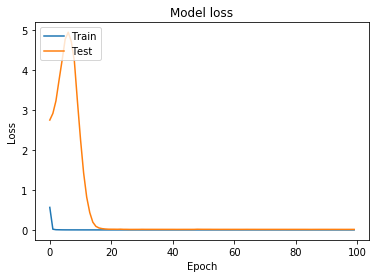

In [29]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [30]:
lb.classes_


array(['circle', 'down', 'eight', 'left', 'nine', 'right', 'seven', 'six',
       'up', 'v', 'w', 'x', 'y', 'z', 'zero'], dtype='<U6')

In [31]:
preds = cnn.predict(x_test_img)
class_index = preds.argmax(axis=-1)
preds_labels = []
print(x_test)
for index in class_index:
    preds_labels.append(lb.classes_[index])
print(preds_labels)


915     /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/eight/IMG...
350     /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/down/IMG_...
702     /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/right/rig...
2247    /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/y/IMG_332...
2321    /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/y/IMG_335...
                              ...                        
752     /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/right/rig...
1445    /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/six/IMG_4...
720     /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/right/rig...
1893    /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/w/IMG_513...
2161    /Users/ongcj/Dev/mdp/ir/cnn/cnn_data/x/IMG_289...
Name: img_path, Length: 252, dtype: object
['eight', 'down', 'right', 'y', 'y', 'seven', 'x', 'z', 'nine', 'up', 'down', 'left', 'zero', 'up', 'y', 'six', 'eight', 'up', 'nine', 'z', 'zero', 'six', 'x', 'w', 'w', 'right', 'y', 'eight', 'left', 'seven', 'down', 'w', 'x', 'z', 'w', 'eight', 'v', 'down', 'down', 'right', 'left', 'y', 'nine', 'w', 'left', 'y', 'ei

In [32]:
accuracy_score(lb.inverse_transform(y_test), preds_labels)

0.996031746031746

In [33]:
cnn.save_weights('final.h5')
